In [2]:
from matplotlib import pyplot as plt
from matplotlib import animation
import math

In [3]:
g = 9.8

In [4]:
def get_intervals(u, theta):
    t_flight = 2*u*math.sin(theta)/g
    intervals = []
    start = 0
    interval = 0.005
    while start < t_flight:
        intervals.append(start)
        start = start + interval
    return intervals

In [8]:
def update_position(i, circle, intervals, u, theta):
    t = intervals[i]
    x = u*math.cos(theta)*t
    y = u*math.sin(theta)*t - 0.5*g*t*t
    circle.center = x,y
    return circle,

In [6]:
def create_animation(u, theta):
    intervals = get_intervals(u, theta)
    xmin = 0
    xmax = u*math.cos(theta)*intervals[-1]
    ymin = 0
    t_max = u*math.sin(theta)/g
    ymax = u*math.sin(theta)*t_max - 0.5*g*t_max**2
    fig = plt.gcf()
    ax = plt.axes(xlim=(xmin, xmax), ylim=(ymin, ymax))
    circle = plt.Circle((xmin, xmax), 1.0)
    ax.add_patch(circle)
    anim = animation.FuncAnimation(
        fig, 
        update_position, 
        fargs = (circle, intervals, u, theta),
        frames= len(intervals), interval = 1,
        repeat = False
                )
    plt.title('Projectile Motion')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

Enter the initial velocity (m/s):  1.0
Enter the angle of projection (degree):  10.0


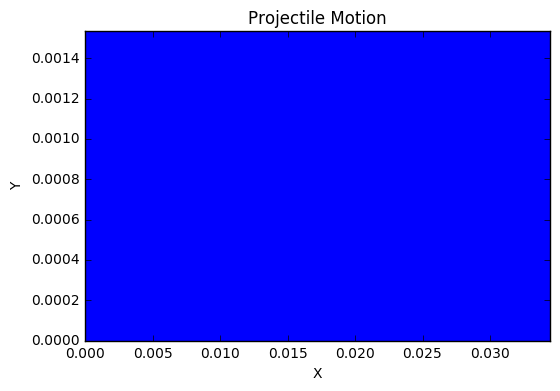

In [10]:
u = float(input('Enter the initial velocity (m/s):  '))
theta = float(input('Enter the angle of projection (degree):  '))
theta = math.radians(theta)
create_animation(u, theta)